In [31]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np

# Preprocessing

In [26]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


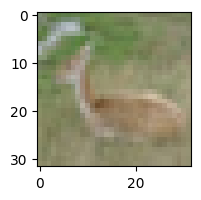

In [27]:
plt.figure(figsize=(2, 2))
plt.imshow(train_images[130])
plt.show()

In [28]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print("The label for this image is:", class_names[int(train_labels[130][0])])

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)


The label for this image is: deer


# Data Augmentation

In [29]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rotation_range=20,          # Rotate images
    width_shift_range=0.2,      # Shift image width
    height_shift_range=0.2,     # Shift image height
    horizontal_flip=True,       # Flip horizontally
    validation_split=0.2        # Split for validation (but only augment training data)
)

# CNN Model

In [30]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu',  kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu',  kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Training and Evaluation

In [36]:
# No augmentation for validation data
validation_datagen = ImageDataGenerator(validation_split=0.2)

# Compile the model using the Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks: learning rate scheduler and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with augmented training data and non-augmented validation data
history = model.fit(
    train_datagen.flow(train_images, train_labels, batch_size=32, subset='training'),
    validation_data=validation_datagen.flow(train_images, train_labels, batch_size=32, subset='validation'),
    epochs=100,
    callbacks=[lr_scheduler, early_stopping]  # Include both lr_scheduler and early_stopping
)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 104s 79ms/step - accuracy: 0.6224 - loss: 1.2586 - val_accuracy: 0.6647 - val_loss: 1.1351 - learning_rate: 0.0010
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 137s 75ms/step - accuracy: 0.6237 - loss: 1.2593 - val_accuracy: 0.6703 - val_loss: 1.1402 - learning_rate: 0.0010
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 76ms/step - accuracy: 0.6186 - loss: 1.2809 - val_accuracy: 0.6874 - val_loss: 1.0844 - learning_rate: 0.0010
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 97s 78ms/step - accuracy: 0.6229 - loss: 1.2849 - val_accuracy: 0.6894 - val_loss: 1.0611 - learning_rate: 0.0010
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 79ms/step - accuracy: 0.6184 - loss: 1.2904 - val_accuracy: 0.6817 - val_loss: 1.1215 - learning_rate: 0.0010
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 96s 76ms/step - accuracy: 0.6241 - loss: 1.2877 - val_accuracy: 0.6532 - val_loss: 1.1886 - learning_rate: 0.0010
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 78ms/st

# Model Prediction Visualization

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


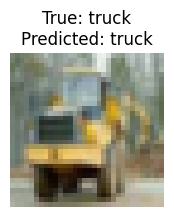

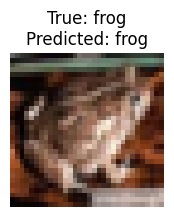

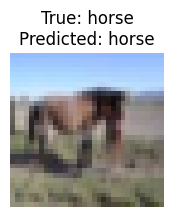

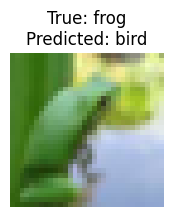

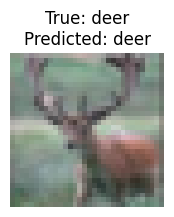

In [37]:
#Get predictions for the test set
predictions = model.predict(test_images)

# Select a few random test images to visualize
num_images = 5
random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)
for i in random_indices:
    plt.figure(figsize=(2, 2))
    plt.imshow(test_images[i])
    plt.title(f"True: {class_names[np.argmax(test_labels[i])]}\nPredicted: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()
